---
# Week 6 HW
<span  style="color:purple; font-size:20px">
Systems & Technologies: Python  
Week 6
</span>

---



In [1]:
# Import Pandas, Matplotlib, and Seaborn and allow for inline plotting

import pandas as pd
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Cotton Tensile Strength Experiment

An investigation into the formulation of synthetic fibers that are used to make cloth was performed. 

The response variable is **tensile strength**, the strength of the fiber (in N). The experimenter wants to determine the best blend of cotton in terms of percent (by weight) to achieve the highest tensile strength of the fiber. Five treatment levels were created for fibers: 15%, 20%, 25%, 30%, and 35% cotton. The experimenters created five replicates on each of the five treatment levels. Thus, there is a single quantitative factor; the percent of cotton combined with synthetic fabric fibers.

Your goal is to extract some insights from the data collected from this experiment.

In [32]:
# Load the data

cotton_exp = pd.read_csv(r'C:\Users\malab\OneDrive\Documents\Systems and Technologies; Python\ST-Python 64502\ST-Python 64502\notebooks/data-sets/cotton_tensile_exp.csv')
cotton_exp

,15%,20%,25%,30%,35%
0,7,12,14,19,7
1,7,17,18,25,10
2,15,12,18,22,11
3,11,18,19,19,15
4,9,18,19,23,11


### Problem 1: (5 points)

<span  style="color:purple; font-size:16px">The data is not in a tidy format. Make the appropriate transformation to a tidy data set called `cotton_tidy`.</span>

Make sure that:

+ the quantitative factor is left as object type
+ you use the names `tensile_strength` and `cotton_pct` for the column names

In [33]:
# Answer
cotton_exp = cotton_exp.reset_index()
cotton_tidy = cotton_exp.melt(id_vars = 'index',
                     var_name = 'cotton_pct',
                     value_name = 'tensile_strength')
cotton_tidy.head(10)

,index,cotton_pct,tensile_strength
0,0,15%,7
1,1,15%,7
2,2,15%,15
3,3,15%,11
4,4,15%,9
5,0,20%,12
6,1,20%,17
7,2,20%,12
8,3,20%,18
9,4,20%,18


### Problem 2: (10 points)

<span  style="color:purple; font-size:16px">Create an overlapping side-by-side swarmplot/violinplot to compare the tensile strength of the fibers by the amount of cotton in the fiber. Use the plot to determine the cotton fiber percentage that gives the strongest tensile strength. How might this information be useful for a clothing manufacturer?</span>

Make sure to:
+ plot the violinplot with color 'lightblue'
+ plot the swarmplot with color 'pink'
+ give the plot an appropriate title, right justified with `fontsize = 15`
+ provide appropriate x/y labels

**Final Plot should look like the following**

![](../../imgs/HW6_Q2_plot.png)

Text(0.5, 1.0, 'Swarmplot on Violinplot of Cotton Percentage vs Tensile Strength')

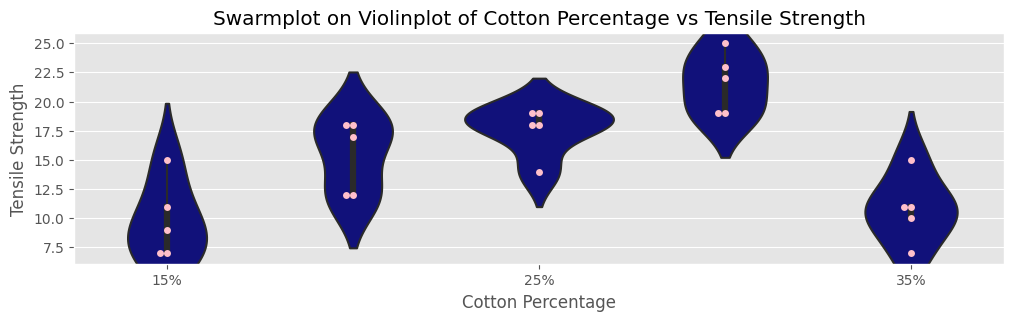

In [34]:
# Answer
fig, ax = plt.subplots(figsize=(12, 3))

sns.violinplot(x = 'cotton_pct', 
               y = 'tensile_strength',
               data = cotton_tidy, 
               ax = ax, 
               color = 'darkblue')

sns.swarmplot(x = 'cotton_pct', 
              y = 'tensile_strength',
              data = cotton_tidy, 
              ax = ax, 
              color = 'pink')

ax.set_xlabel('Cotton Percentage')
ax.set_ylabel('Tensile Strength')
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.set_title('Swarmplot on Violinplot of Cotton Percentage vs Tensile Strength')

# 30% cotton percentage was found to have the highest tensile strength. 
# This information is obviously useful for a clothing manufacturer because
# depending on the use of the cloth, there might need to be more or less 
# tensile strength. For instance, if you were looking to use the cloth for
# a baby-carrier, you would want to use cloth with excellent tensile
# strength. 

### Problem 3: (5 points)

<span  style="color:purple; font-size:16px">In the previous analysis, we handled the explanatory variable `cotton_pct` as a categorical variable. Create a new variable in the `cotton_tidy` data set which is a numerical representation of the variable by removing the *%* sign and making the appropriate data type conversion. Call this new variable `cotton_pct_numeric`.</span>

In [35]:
# Answer
cotton_tidy['cotton_pct_numeric'] = cotton_tidy['cotton_pct'].str.replace('%', '').str.replace(r"(\d{1,2})", r".\1", regex=True).astype('float')
cotton_tidy = cotton_tidy.drop(columns = 'cotton_pct')
cotton_tidy.head(10)

,index,tensile_strength,cotton_pct_numeric
0,0,7,0.15
1,1,7,0.15
2,2,15,0.15
3,3,11,0.15
4,4,9,0.15
5,0,12,0.20
6,1,17,0.20
7,2,12,0.20
8,3,18,0.20
9,4,18,0.20


### Problem 4: (5 points)

<span  style="color:purple; font-size:16px">Using the newly created `cotton_pct_numeric` variable, create a plot using Seaborn's `pointplot()`, specifying the estimator to be `pd.np.median`. Describe the relationship between the percentage of a fiber that is cotton and the median tensile strength. If you were designing the strongest possible fiber, how much cotton (in terms of percent of fiber by weight) would you use? Provide a range of plausible values for the median tensile strength of fibers made with 30% cotton by weight.</span>

Make sure to:
+ give the plot an appropriate title, right justified with fontsize = 15
+ provide appropriate x/y labels

**Final Plot should look like the following**

![](../../imgs/HW6_Q4_plot.png)

C:\Users\malab\AppData\Local\Temp\ipykernel_28196\10950743.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data=cotton_tidy, x="cotton_pct_numeric", y="tensile_strength", capsize=.4, color=".1", errorbar='sd',estimator = pd.np.median,


[Text(0.5, 1.0, 'Point Plot of Median Tensile Strength vs Cotton Percentage')]

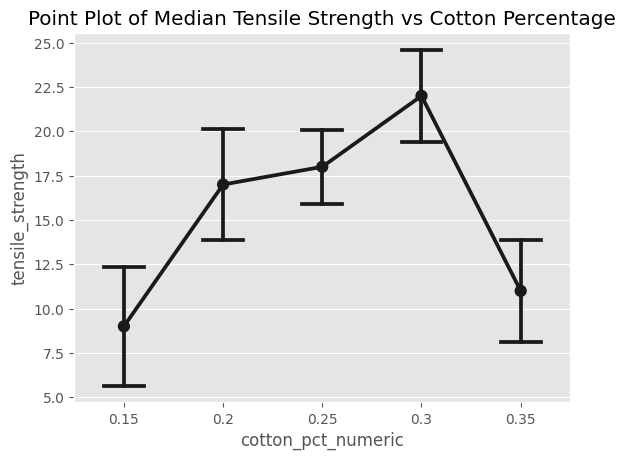

In [55]:
# Answer
sns.pointplot(
    data=cotton_tidy, x="cotton_pct_numeric", y="tensile_strength", capsize=.4, color=".1", errorbar='sd',estimator = pd.np.median,
).set(title= "Median Tensile Strength vs Cotton Percentage")

# If I were designing the strongest possible fiber, I would ensure to use 30% fiber by weight of cotton.
# The range of plausible values for the median tensile strength of fibers with 30% cotton by weight is 19.5-24.5.

---

## Nicotine Content - A Lawsuit against big tobacco.

In a 1994 Senate subcommittee hearing, an executive of a major tobacco company testified that the accusation that nicotine was added to cigarettes was false. Tobacco company scientists stated that the amount of nicotine in cigarettes was completely determined by the size of the tobacco leaf, with smaller leaves having a greater nicotine content. Thus, the variation in the nicotine content occurred due to a variation in the size of the tobacco leaves and was not due to any additives placed in the cigarettes by the company. Furthermore, the company argued that the size of the leaves varied depending on the weather conditions during the growing season, for which they had no control. 

To study whether smaller tobacco leaves had a higher nicotine content, a consumer health organization conducted the following experiment. The major factors controlling the leaf size are temperature and the amount of water received by the plants during the growing season. The experimenters created four types of growing conditions for tobacco plants.

+ A = average temperature and average rainfall amounts
+ B = lower than average temperature and rainfall amounts
+ C = higher temperatures with lower rainfall
+ D = higher than normal temperature and rainfall

The scientists then planted 10 tobacco plants in each of the 4 growing conditions in a greenhouse where the temperature and amount of moisture were carefully controlled. After growing the plants, the scientists recorded the leaf size and nicotine content, which are provided in the `nicotine.csv` data set.

Your goal is to create appropriate visualizations to assess the validity of the claim made by the tobacco company.

In [56]:
# Load the data

nicotine = pd.read_csv(r'C:\Users\malab\OneDrive\Documents\Systems and Technologies; Python\ST-Python 64502\ST-Python 64502\notebooks/data-sets/nicotine.csv')
nicotine.sample(5)

,Growing Conditions,Leaf Size,Nicotine Content
28,C,18.4,7.5
27,C,16.7,7.7
8,A,26.2,10.5
18,B,6.9,8.3
4,A,19.4,11.4


### Problem 5: (5 points)

<span  style="color:purple; font-size:16px">Create two plots side-side using `plt.subplots()`. The plots will both be horizontal *notched side-by-side boxplots*. The left plot should be side-by-side notched boxplots of leaf size by growing conditions and the right plot should be side-by-side notched boxplots of nicotine content by growing conditions. Use the resulting plot to provide evidence to either confirm or refute the tobacco companies argument.</span>

**Interpret the plots. How does these plots confirm or refute the claim made by the tobacco company?**

Make sure to include:

+ put growing condition on the y-axis and have the two plots share the y-axis
+ remove the y-axis label for the plot on the right
+ provide appropriate x/y-axis labels
+ provide an appropriate title to the entire plot! Use the `figure.suptitle(<title>)` method to do this. Note, this assumes you have named the figure object `figure`.
+ make the plot 15 units wide and 10 units tall

**Final Plot should look like the following**

![](../../imgs/HW6_Q5_plot.png)

Text(0.5, 0.98, 'Leaf Type and Nicotine Content vs Growing Conditions Side-by-Side Box Plots')

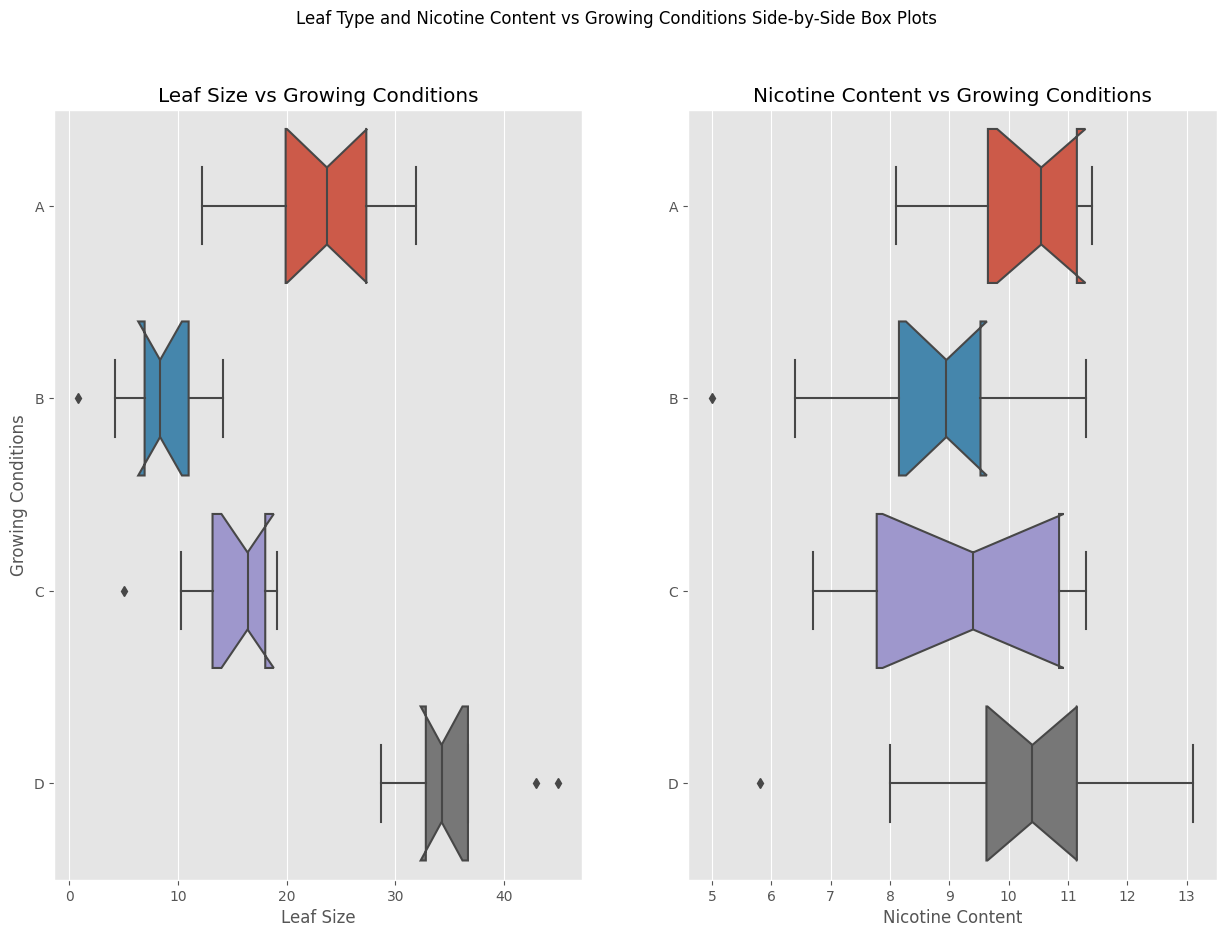

In [274]:
# Answer 
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.boxplot(x = 'Leaf Size', y = 'Growing Conditions', data = nicotine, ax = axes[0], notch = True)
axes[0].set_xlabel('Leaf Size')
axes[0].set_title('Leaf Size vs Growing Conditions')

sns.boxplot(x = 'Nicotine Content', y = 'Growing Conditions', data = nicotine, ax = axes[1], notch = True)
axes[1].set_xlabel('Nicotine Content')
axes[1].set_ylabel('')
axes[1].set_title('Nicotine Content vs Growing Conditions')
fig.suptitle("Leaf Type and Nicotine Content vs Growing Conditions Side-by-Side Box Plots")

# After visualizing the data below, it is clear that there is a weak positive correlation 
# between leaf size and nicotine content. 

### Problem 6: (10 points)

<span  style="color:purple; font-size:16px">Another approach to visualizing the tobacco data would be to create a scatterplot of Leaf Size versus Nicotine Content with a line-of-best-fit for each Growing Condition.  Use Seaborn's `lmplot()` plotting method to create such a plot. (Note: `lmplot()` is a little frustrating to work with since it creates its own figure object. You will have a hard time customizing some components of the plot. Looking at the documentation for `lmplot()` should help. Google or Stack Overflow are also good resources if you get stuck.)</span>

Make sure to:

+ put Nicotine Content on the y-axis and Leaf Size on the x-axis
+ allow for a line-of-best-fit that varies by Growing Condition
+ use the 'bright' color palette
+ use four different markers, one for each Growing Condition
+ include 95% confidence intervals for each line-of-best-fit
+ move the legend out of the plotting area
+ provide appropriate x/y labels
+ provide an appropriate title (Hint: You can use `fig.suptitle()`)
+ make the plot 15 units tall (this plot will be very large)

**Interpret the plot. How does this plot confirm or refute the claim made by the tobacco company?**

**Final Plot should look like the following**

![](../../imgs/HW6_Q6_plot.png)

C:\Users\malab\AppData\Roaming\Python\Python310\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\malab\AppData\Roaming\Python\Python310\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Leaf Size vs Nicotine Content')

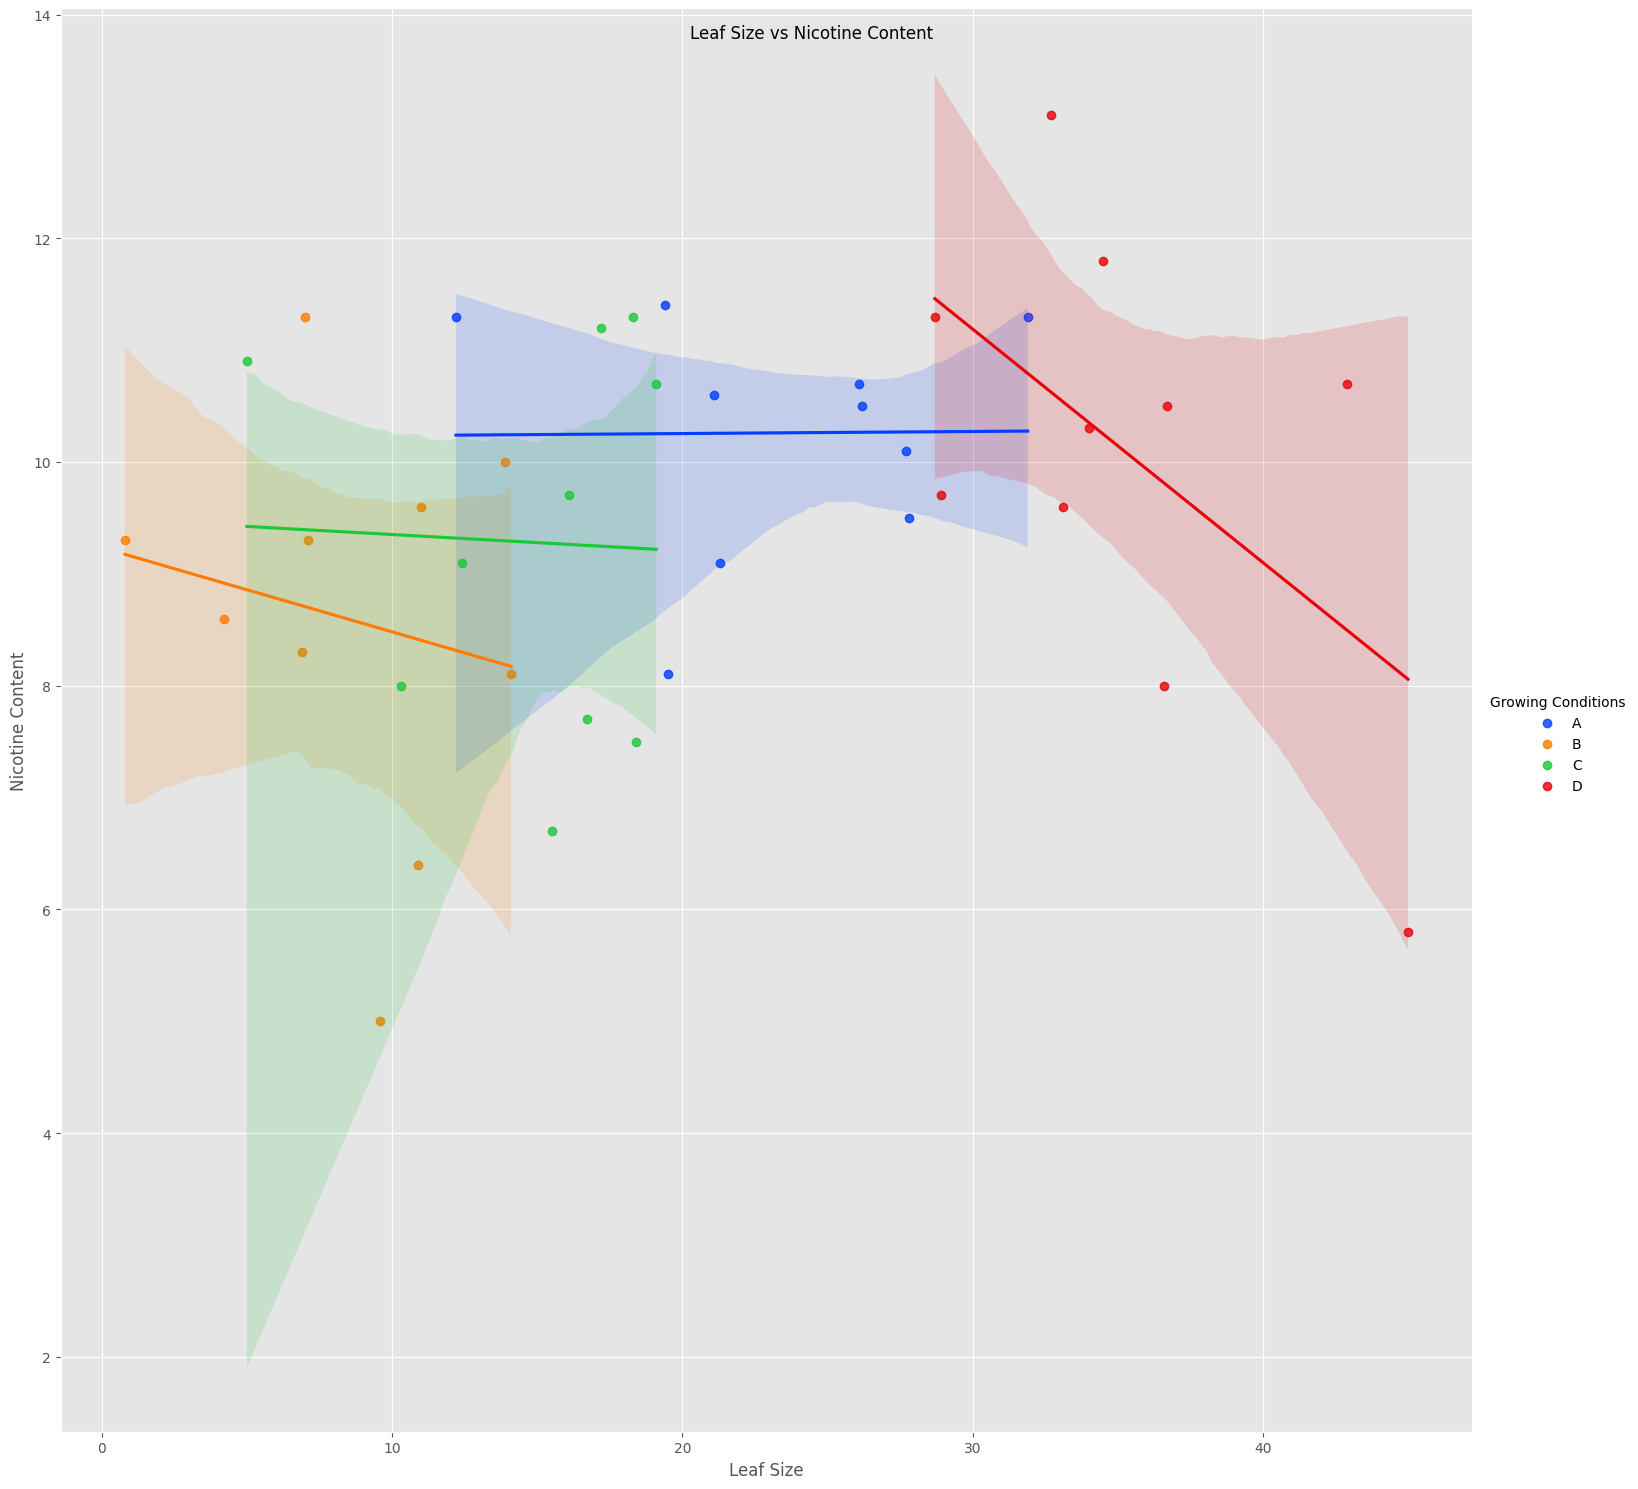

In [120]:
# Answer
lm = sns.lmplot(x='Leaf Size', 
            y='Nicotine Content',
            hue='Growing Conditions',
            palette='bright',
            data=nicotine,  
            sharex=True,
            sharey=True,
            height=15)

fig = lm.fig 
fig.suptitle("Leaf Size vs Nicotine Content", fontsize=12)

---
## Birthday Problem

A famous problem often encountered in a probability class is the *Birthday Problem*. The problem is stated as, 'given a room containing *n* randomly chosen people, what is the probability that at least two of them will have the same birthday?' 

In the following problems, you will use a simulation to analyze this problem and create an appropriate visualization to display your results in an intuitive manner. A function `birthday_sim()` has been coded up for you below. 

The function accepts two arguments:

+ `number_people` = the number of people in the room
+ `num_sims` = the number of times to simulate having `number_people` in a room and determining if at least one pair of people has a matching birthday

In [125]:
import random

def birthday_sim(number_people = 20, num_sims = 1000):
    
    matches = []
    possible_birthdays = [i for i in range(0,365)]
    for party in range(num_sims):
        birthdays = pd.Series(random.choices(possible_birthdays, k=number_people))
        matches.append('Match') if birthdays.nunique() < number_people else matches.append('No Match')

    return matches.count('Match')/len(matches)

# Test: if 20 people are in a room, what is the approximate probability
# that at least two of them share a birthday?
birthday_sim(number_people = 20)

0.42

### Problem 7: (5 points)

<span  style="color:purple; font-size:16px">Use the `birthday_sim()` function to create a DataFrame with two columns: `num_people` and `prob_match`. Run the simulation over all values of `num_people` from 2 to 80. (Hint: One possible approach is to create two lists using an appropriate *comprehension* with the values then make a dictionary before creating a DataFrame.)</span>

In [186]:
# Answer
data_df = pd.DataFrame(columns = ['num_people','prob_match'])
data = []
for num_people in range(80):
    if num_people == 0:
        continue
    elif num_people == 1:
        continue
    else:
        prob_match = birthday_sim(number_people = num_people)
        data_df2 = pd.DataFrame({'num_people': num_people, 'prob_match': prob_match}, index = [0])
        data_df = pd.concat([data_df,data_df2])
data_df.reset_index(inplace = True)
data_df.drop(columns = 'index', inplace = True)
data_df.head(10)

,num_people,prob_match
0,2,0.002
1,3,0.005
2,4,0.025
3,5,0.028
4,6,0.031
5,7,0.044
6,8,0.086
7,9,0.100
8,10,0.111
9,11,0.136


### Problem 8: (10 points)

<span  style="color:purple; font-size:16px">Create a line plot with the `num_people` on the x-axis and the `prob_match` on the y-axis. What number of people do you need to have in a room to have the probability that there is at least one match be: 50%, 75%, or 90%? How many people do you need in a room to have nearly a 100% probability of a match? Is this surprising to you?</span>

Be sure to:

+ make the figsize 12 units wide and 10 units tall
+ give the plot an appropriate title that is left justified and uses a font size of 30
+ label the axes appropriately with a fontsize of 20
+ use arrows and appropriate text annotations to point to the number of people required for probability of at least one match of 50%, 75%, and 90% [ex. "50% probability with 24 people" with an arrow pointing at (24, .5)]
+ use a marker for the points and a linewidth of 3

**Final Plot should look like the following**

![](../../imgs/HW6_Q8_plot.png)

In [215]:
# Answer - part 1, extract number of people
number_50_perc = data_df[data_df['prob_match']>=.5]
fifty = number_50_perc['num_people'].iat[0]
number_75_perc = data_df[data_df['prob_match']>=.75]
seventy_five = number_75_perc['num_people'].iat[0]
number_90_perc = data_df[data_df['prob_match']>=.90]
ninety = number_90_perc['num_people'].iat[0]

Text(40, 0.9, '90%!')

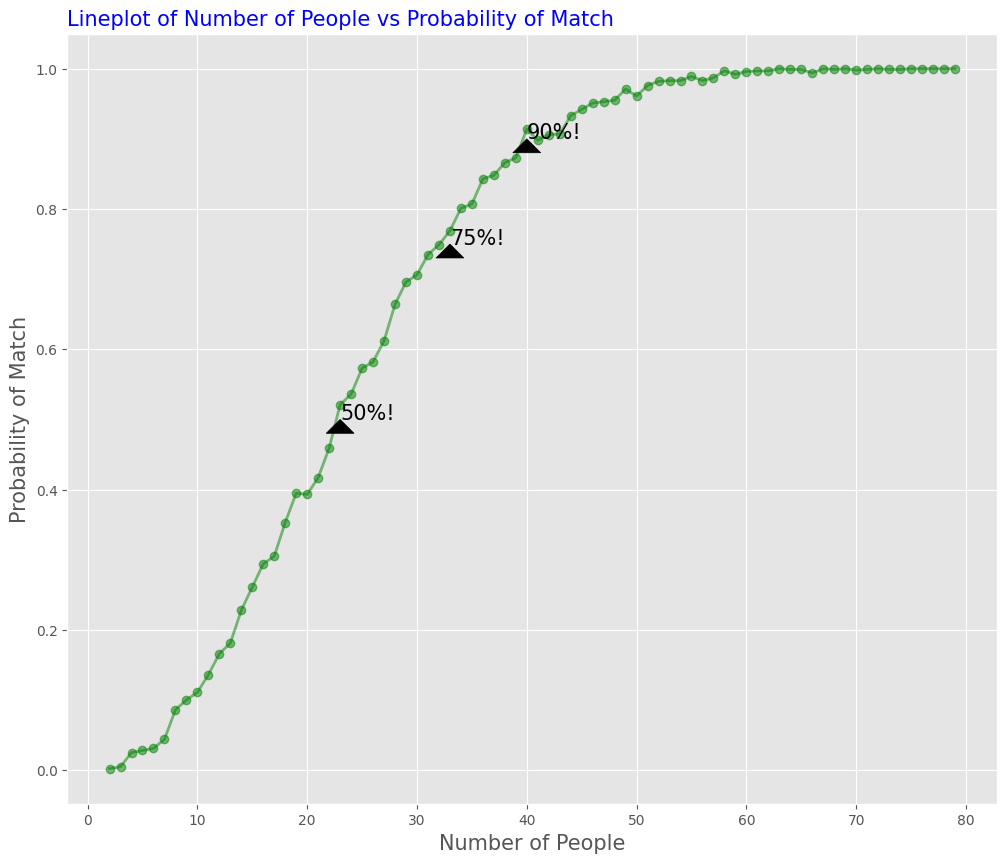

In [216]:
# Answer - part 2, create plot
fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(data_df['num_people'], data_df['prob_match'],
         linewidth=2.0,
         color='g',
         alpha=0.5,
         marker='o')
ax.set_xlabel('Number of People', fontsize = 15)
ax.set_ylabel('Probability of Match', fontsize = 15)
ax.set_title('Lineplot of Number of People vs Probability of Match',
               loc='left', 
               color='blue',
               fontsize = 15)

ax.annotate(
    '50%!', 
    fontsize = 15,
    xy=(fifty, .5), 
    xytext=(fifty, .5),
    arrowprops=dict(  
        width=5, 
        headwidth=20, 
        headlength=10,
        color='black'
    )  
)

ax.annotate(
    '75%!', 
    fontsize = 15,
    xy=(seventy_five, .75), 
    xytext=(seventy_five, .75),
    arrowprops=dict( 
        width=5, 
        headwidth=20, 
        headlength=10,
        color='black'
    )  
)

ax.annotate(
    '90%!', 
    fontsize = 15,
    xy=(ninety, .9), 
    xytext=(ninety, .9),
    arrowprops=dict(  
        width=5, 
        headwidth=20, 
        headlength=10,
        color='black'
    )  
)

---

## Shark Tank

*Shark Tank* is a popular reality TV show. The premise of the show is that entrepreneurs pitch their idea for a company to a panel of potential investors (the 'sharks') who then decide whether or not to invest in the company. The investors, if they decide to invest in a company, give a certain amount of money for a percentage stake in the company (the "equity").

The data for the first 4 seasons of the show is available at `../data-sets/shark_tank.csv`.

| Name: | Description: |
|:-------|:--------------|
| Season  | Season when episode aired |
| No. in series | Episode Number in Season |
| Company  | Company Name being pitched to investors |
| Deal | Whether or not a deal was made with the investors |
| Industry | Industry company in |
| Entrepreneur Gender | Gender of the entrepreneur making the pitch |
| Amount | Amount of money sharks invested in company |
| Equity  |	Percentage Equity sharks received in the company |
| Corcoran - Guest   | Last Name of each of the 7 main investors on the show and one column for Guest investors, 1 indicates that particular shark invested in the company |
| Details/Notes  | Extra Details about the deal |

The following questions require you to create various visualizations to answer questions about the show.

In [242]:
# Load the data

shark_tank = pd.read_csv(r'C:\Users\malab\OneDrive\Documents\Systems and Technologies; Python\ST-Python 64502\ST-Python 64502\notebooks/data-sets/shark_tank.csv')
shark_tank.head(3)

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Problem 9: (5 points)

<span  style="color:purple; font-size:16px">**Data Cleaning** - The `Amount` and `Equity` are currently being treated as categorical variables (dtype: object). Can you figure out why this is? Clean up these columns using the appropriate string accessor methods and cast these two columns to numeric types (i.e., a dtype of int or float) as you will need to perform mathematical operations on these columns. After making the conversion, use the appropriate Pandas method to verify the conversions were done successfully.</span>

In [243]:
# Convert data
shark_tank['Amount'] = shark_tank['Amount'].str.replace('$', '', regex = True).str.replace(',', '', regex = True).fillna(0).astype('float')
shark_tank['Equity'] = shark_tank['Equity'].str.replace('%', '', regex = True).fillna(0).astype('float')

In [236]:
# Verify types were converted appropriately
shark_tank.sample(10)

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
11,1.0,3.0,Stress Free Kids,Yes,Children / Education,Female,250000.0,50.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,3.0,12.0,Nail Pak,Yes,Fashion / Beauty,Female,50000.0,40.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
220,4.0,16.0,HDYR Sushi Bars,Yes,Food and Beverage,Male,1000000.0,20.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,4.0,9.0,ReVestor,No,Software / Tech,Male,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,4.0,24.0,Track Days,No,Uncertain / Other,Male,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,4.0,7.0,The Shemie,No,Fashion / Beauty,Male,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,4.0,10.0,Ruck Pack Combat Nutrition,Yes,Fashion / Beauty,Male,150000.0,20.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
123,3.0,6.0,Five Minute Furniture,No,Lifestyle / Home,Male,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2.0,8.0,Original Runner Company,No,Lifestyle / Home,Female,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Problem 10: (10 points)

<span  style="color:purple; font-size:16px">Create a new DataFrame `shark_tank_funded` containing only companies that struck a deal with the sharks. Add a new column to this DataFrame called `Company Value`. If investors were willing to pay \\$50,000 for a 55% stake in a company, then the investors must think the company is worth \\$90,909.10 since 55% of \\$90,909.10 is \\$50,000.</span>

In [244]:
# Answer
shark_tank_funded = shark_tank[shark_tank['Deal'] == 'Yes']
shark_tank_funded['Company Value'] = shark_tank_funded['Amount'] * (100 / shark_tank_funded['Equity'])
shark_tank_funded.head(10)

C:\Users\malab\AppData\Local\Temp\ipykernel_28196\3225098795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_tank_funded['Company Value'] = shark_tank_funded['Amount'] * (100 / shark_tank_funded['Equity'])


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Company Value
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.090909e+04
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.200000e+05
5,1.0,2.0,A Perfect Pear,Yes,Food and Beverage,Female,500000.0,50.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.000000e+06
6,1.0,2.0,Classroom Jams,Yes,Children / Education,Male,250000.0,10.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,2.500000e+06
10,1.0,3.0,Turbobaster,Yes,Food and Beverage,Female,35000.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2% royalty,3.500000e+04
11,1.0,3.0,Stress Free Kids,Yes,Children / Education,Female,250000.0,50.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+05
15,1.0,4.0,Gift Card Rescue,Yes,Software / Tech,Male,200000.0,50.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4.000000e+05
16,1.0,4.0,Coverplay,Yes,Children / Education,Female,35000.0,40.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.750000e+04
20,1.0,5.0,My Therapy Journal,Yes,Healthcare,Male,80000.0,51.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.568627e+05
21,1.0,5.0,Body Jac,Yes,Fitness / Sports,Male,180000.0,50.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,contingent on him losing 30 pounds!,3.600000e+05


### Problem 11: (10 points)

<span  style="color:purple; font-size:16px">What were the top 20 most valuable companies? What were the top 20 largest investments made? Were the largest investments made in the most valuable companies?</span>

<span  style="color:purple; font-size:16px">To answer these questions, make a two-panel plot. On the left plot, create a horizontal bar chart of the top 20 most valuable companies. On the right plot, create a horizontal bar chart of the top 20 largest investments made by the sharks. Comment on your findings.</span>

When making your plots, make sure to include the following:

+ set the index to be the company name
+ use Pandas `plot(kind = 'barh')` for each plot
+ set appropriate y-axis label for the left plot and no label for the right plot as company name is the y-axis for both plots
+ set an appropriate x-axis label for each plot
+ create an appropriate left justified title for each plot
+ use `fig.suptitle()` to provide a title for the entire two-panel plot
+ make the figure size `figsize = (35,20)`

**Final Plot should look like the following**

![](../../imgs/HW6_Q11_plot.png)

In [245]:
# Set the index to be the company name
shark_tank_funded = shark_tank_funded.set_index('Company')

Text(0.5, 0.98, 'Horizontal Bar Graph of 20 Largest Company Values vs 20 Largest Investments')

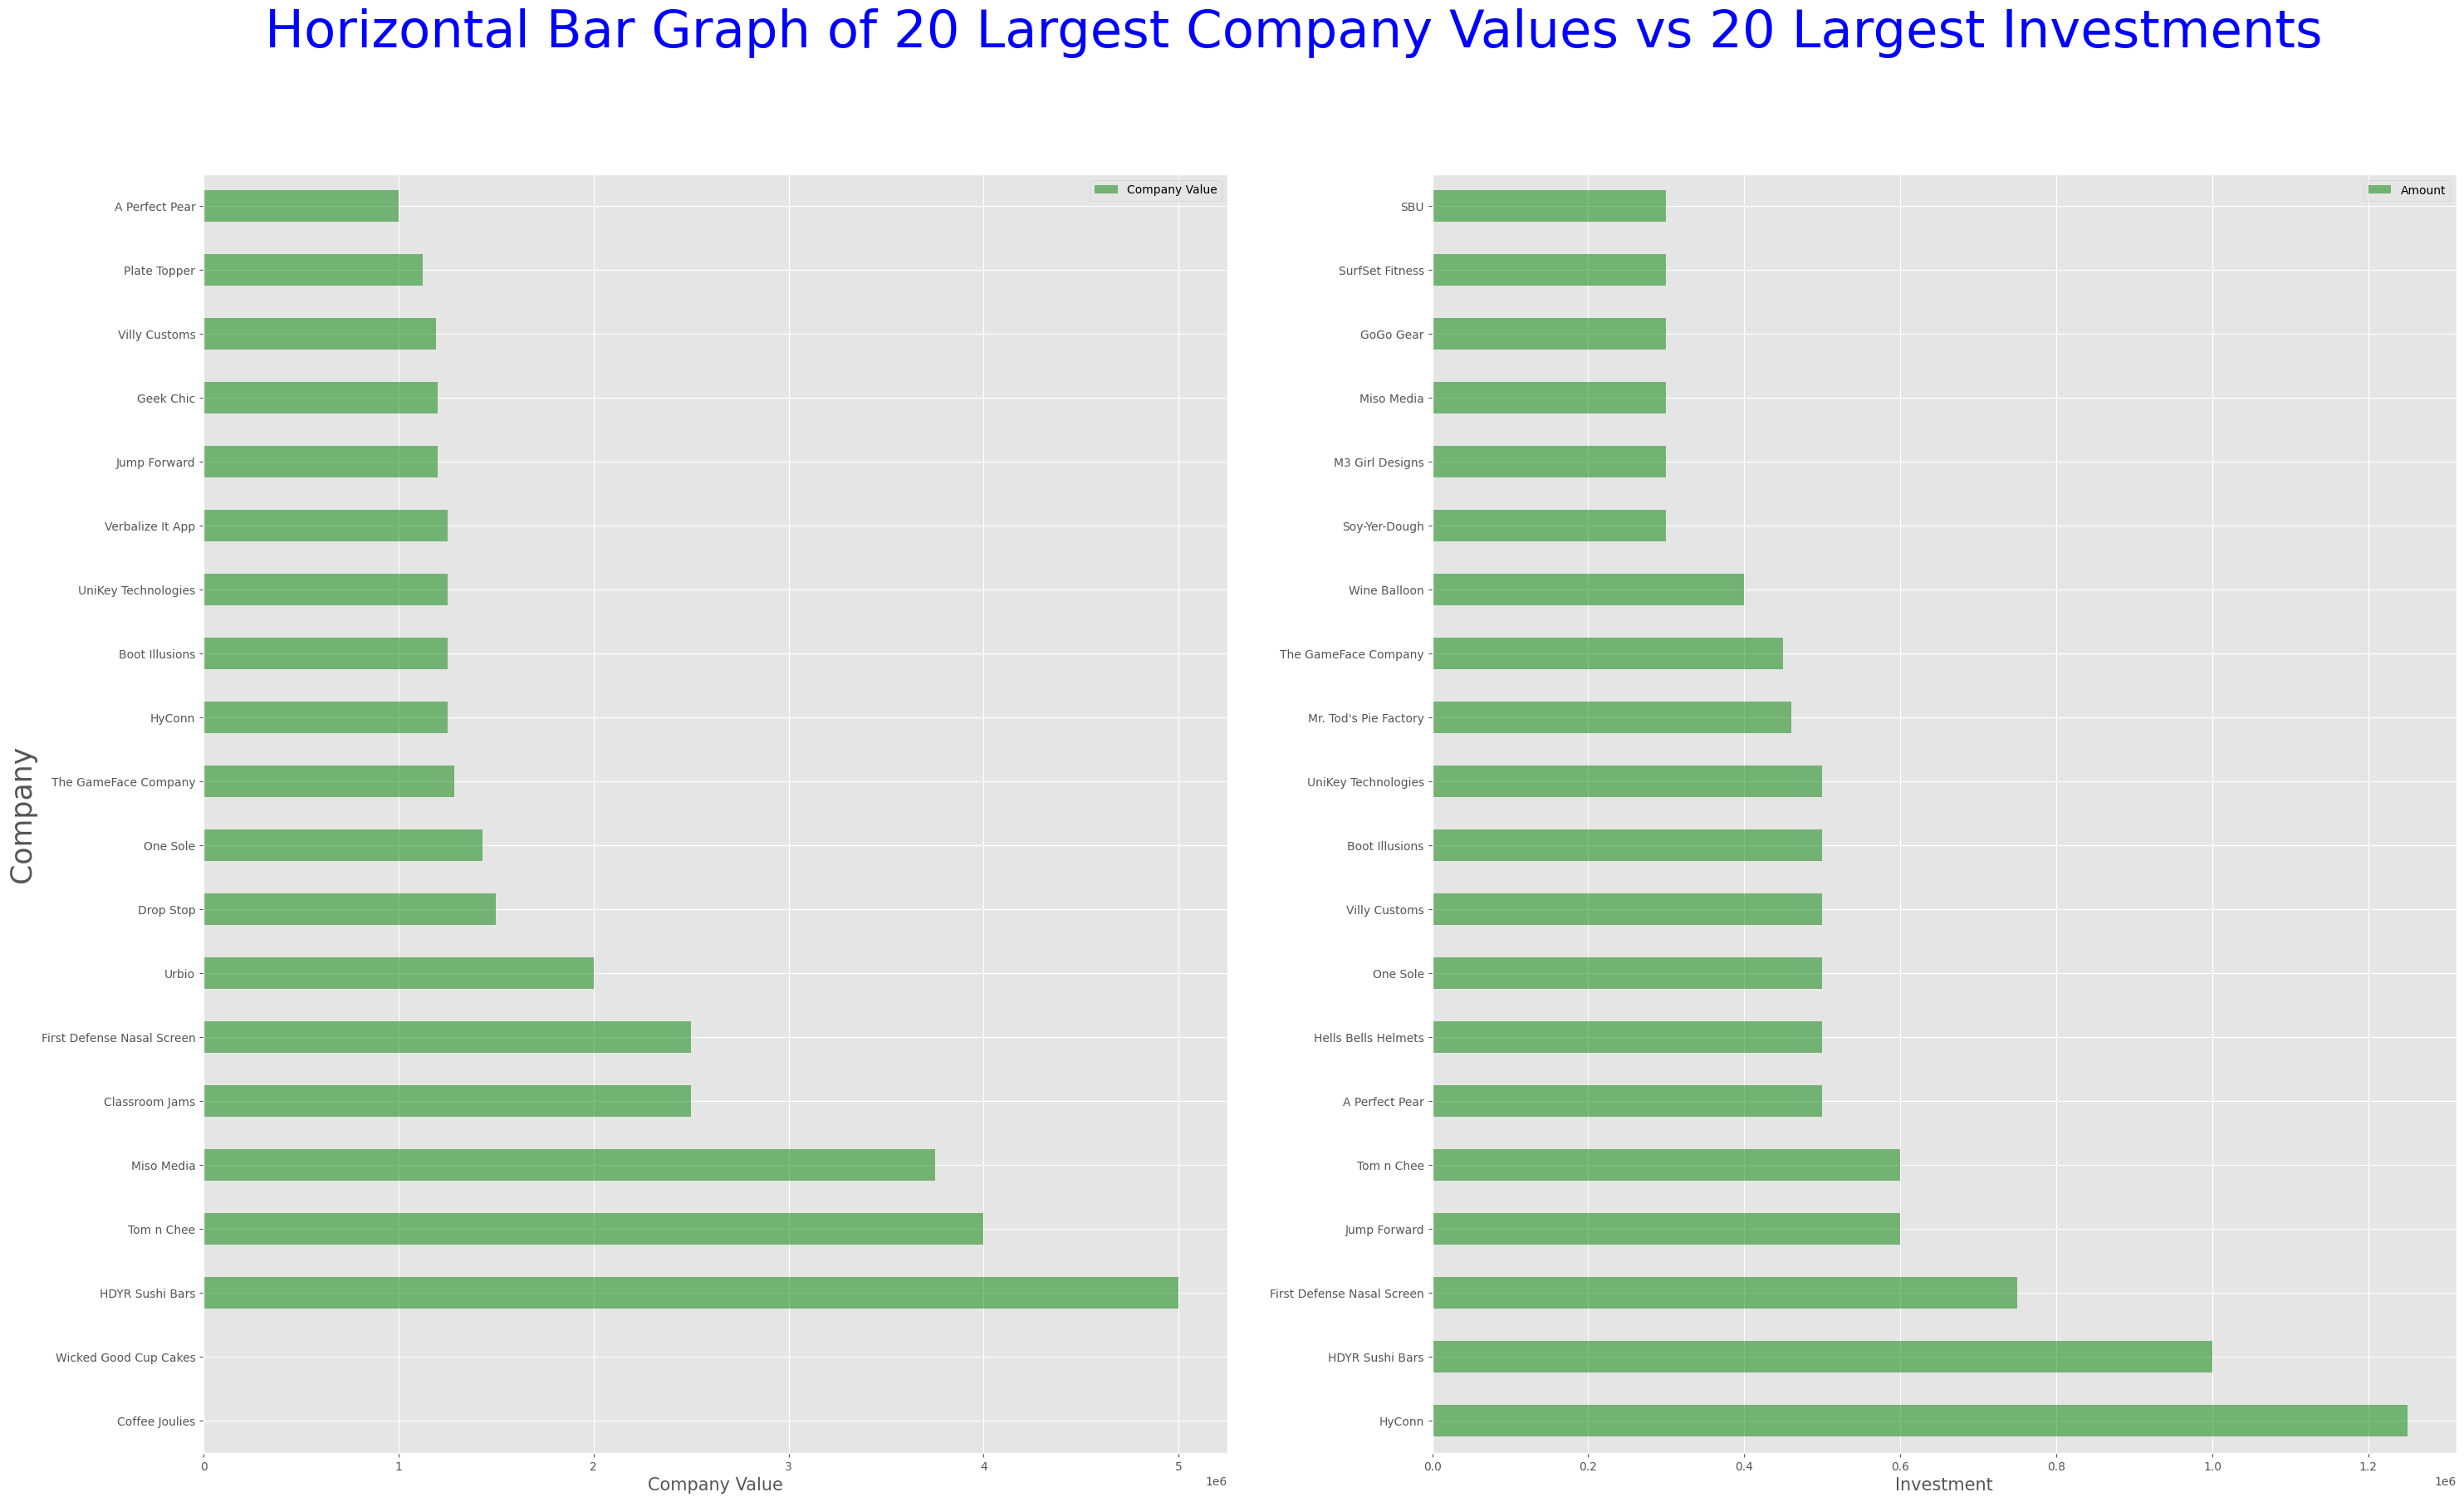

In [280]:
# Answer

filt = shark_tank_funded.nlargest(20, 'Company Value')
filt2 = shark_tank_funded.nlargest(20, 'Amount')

fig, axes = plt.subplots(1, 2, figsize=(35, 20))

axes[0] = filt.plot.barh(y = 'Company Value', ax = axes[0],
         linewidth=2.0,
         color='g',
         alpha=0.5)
axes[0].set_xlabel('Company Value', fontsize = 15)
axes[0].set_ylabel('Company', fontsize = 25)

axes[1] = filt2.plot.barh(y = 'Amount', ax = axes[1],
         linewidth=2.0,
         color='g',
         alpha=0.5)
axes[1].set_xlabel('Investment', fontsize = 15)
axes[1].set_ylabel('')
fig.suptitle('Horizontal Bar Graph of 20 Largest Company Values vs 20 Largest Investments', 
               color='blue',
               fontsize = 45)

# For many of the top companies, the corresponding investment made was also in the top 20.
# However, some of the companies definitely proved the sharks wrong and defied all odds,
# although it was rare. For example, Coffee Joules and Wicked Good Cupcakes bosted the 
# top company value spots but did not make the list of the top 20 investments at all!

### Problem 12: (10 points)

<span  style="color:purple; font-size:16px">Explore the relationship between the `Amount` invested and the `Company Value` by the `Entrepreneur Gender` for companies that received funding.</span>

<span  style="color:purple; font-size:16px">To answer these questions, make a two-panel plot. On the left plot, create a scatterplot of the `Amount` invested (on the x-axis) and the `Company Value` (on the y-axis) with points colored by the `Entrepreneur Gender`. On the right plot, create a horizontal bar chart of the frequency of investments for each level of `Entrepreneur Gender`. Comment on your findings.</span>

For the left plot:
+ use Seaborn's `sns.scatterplot()` to create the plot on the left
+ create a legend in the upper left corner

For the right plot:
+ use Seaborn's `sns.countplot()` to create the plot on the right

When making your plots, make sure to include the following:

+ set an appropriate x/y-axis label 
+ create an appropriate title for each plot
+ use `fig.suptitle()` to provide a plot for the entire two-panel plot
+ make the figure size `figsize = (25,15)`


**Final Plot should look like the following**

![](../../imgs/HW6_Q12_plot.png)

Text(0.5, 0.98, 'Scatterplot of Amount Invested vs Company Value Colored by Gender and Horizontal Bar Plot of Gender')

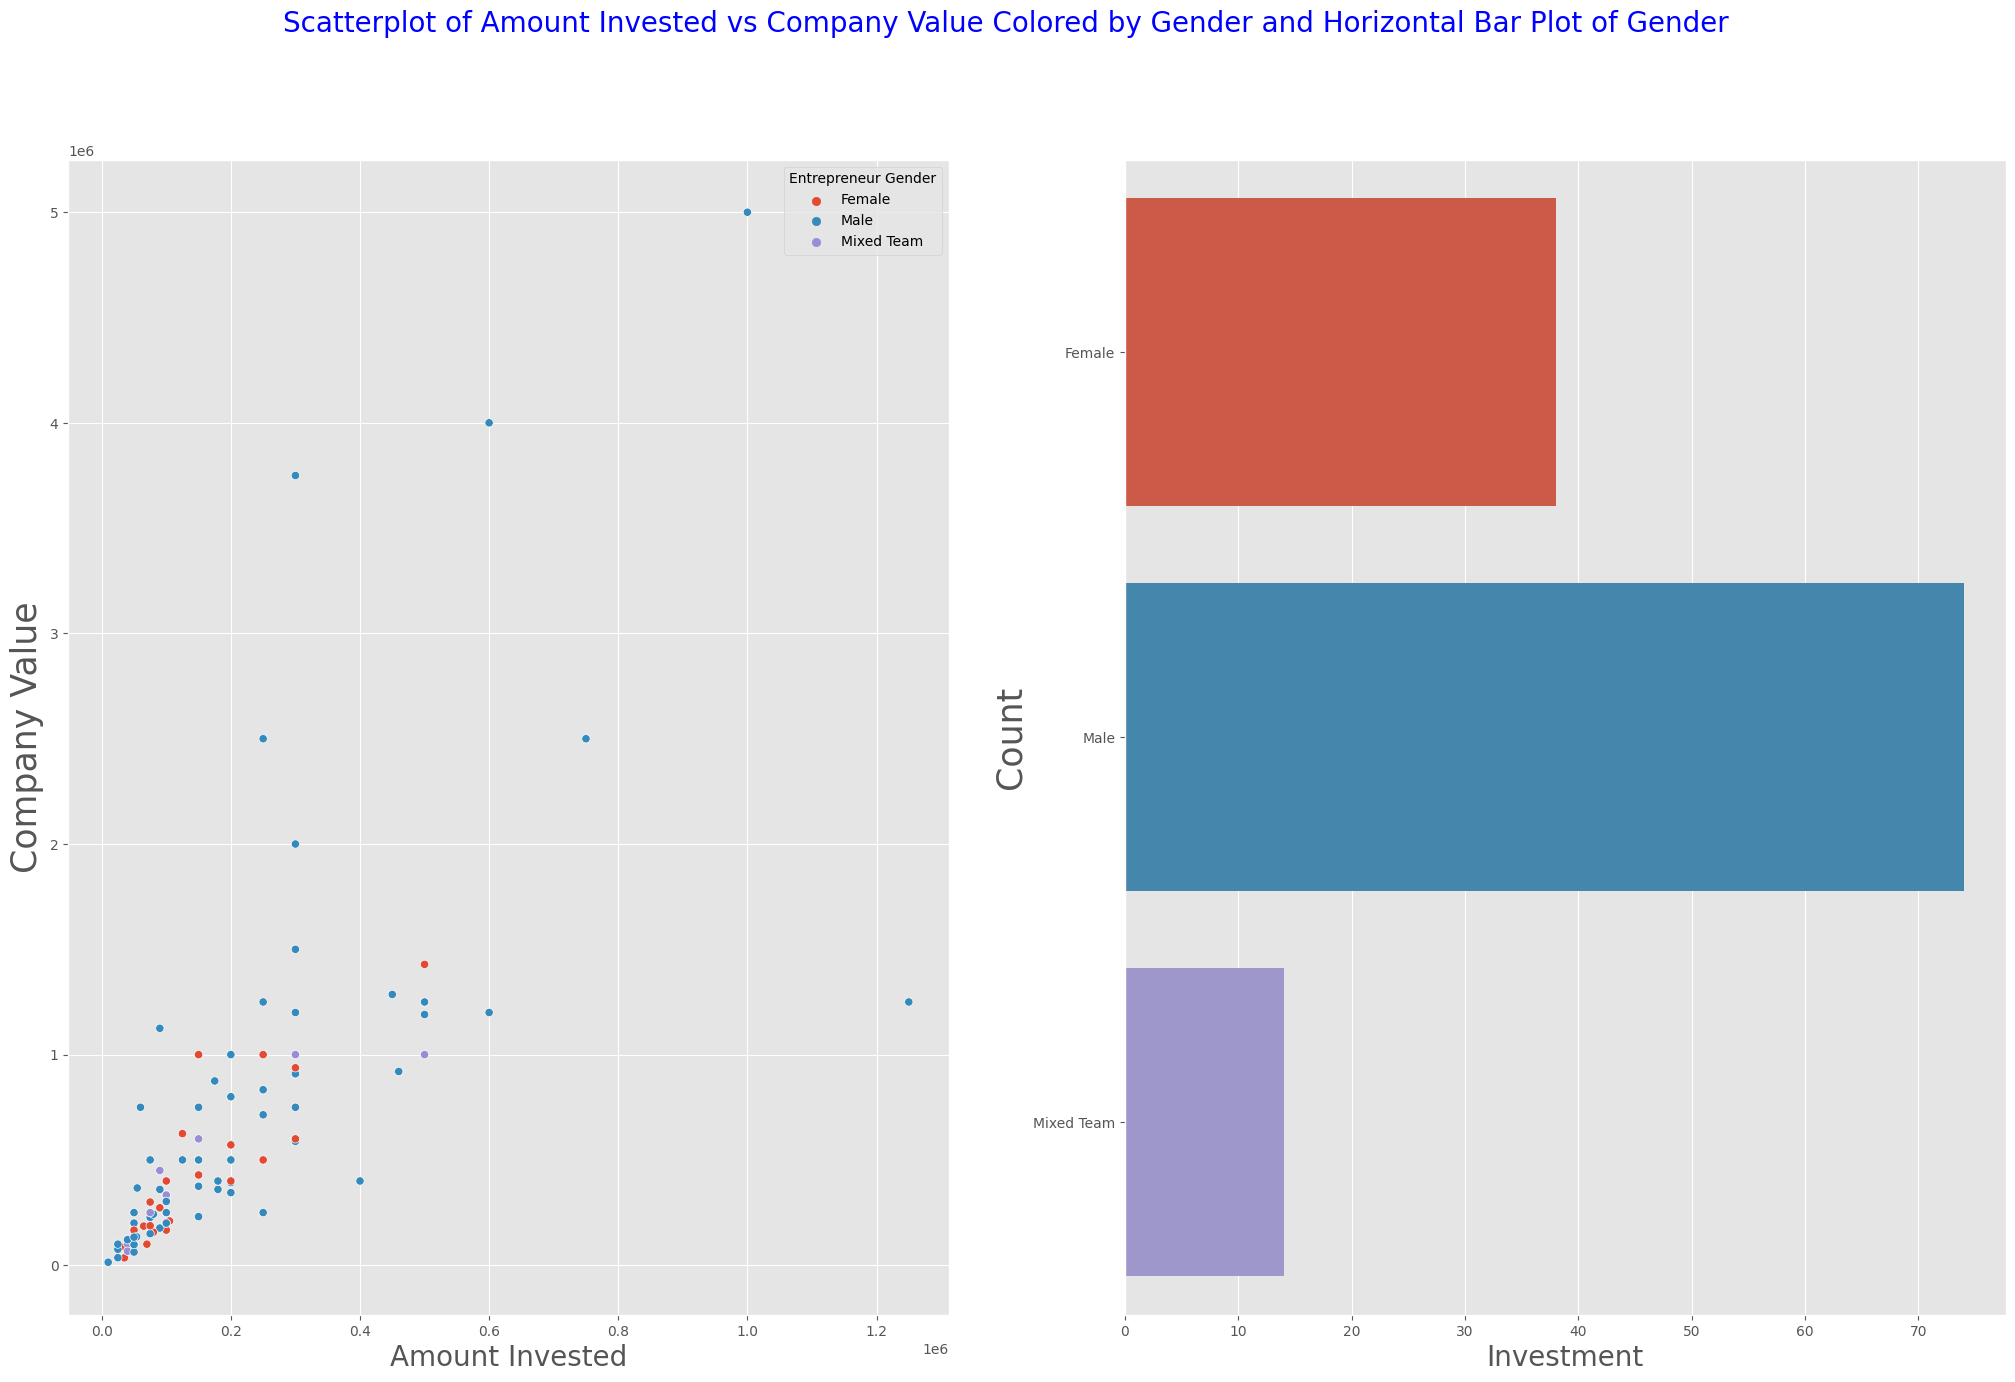

In [294]:
# Answer
fig, axes = plt.subplots(1, 2, figsize=(25, 15))

sns.scatterplot(x = 'Amount', y = 'Company Value', hue = 'Entrepreneur Gender', data = shark_tank_funded, ax = axes[0])
axes[0].set_xlabel('Amount Invested', fontsize = 20)
axes[0].set_ylabel('Company Value', fontsize = 25)

sns.countplot(y = 'Entrepreneur Gender', data = shark_tank_funded, ax = axes[1])
axes[1].set_xlabel('Investment', fontsize = 20)
axes[1].set_ylabel('Count', fontsize = 25)
fig.suptitle('Scatterplot of Amount Invested vs Company Value Colored by Gender and Horizontal Bar Plot of Gender', 
               color='blue',
               fontsize = 20)

# My findings tell me that the highest company values came from entreprenuers who were male.
# They also tell me that the number of companies with a male entrepreneur who was invested in 
# is approximately double that of the number of companies with a female entrepreneur. 

### Problem 13: (10 points)

<span  style="color:purple; font-size:16px">Do the sharks tend to favor certain industries? What industry have the sharks invested in most? What industry has the largest proportion of deals to no-deals?</span>

<span  style="color:purple; font-size:16px">To answer this question, create a heatmap showing the frequencies of whether a `Deal` was made by `Industry`. Use the full `shark_tank` data. Comment on your findings.</span>

When making your plots, make sure to include the following:

+ use `pivot_table()` to get the data in the right form. You want `Deal` as the index, `Industry` as the columns, and the `aggfunc = 'size'`
+ create a heatmap that is 10 units tall and 4 units wide 
+ create an appropriate title for the plot

**Final Plot should look like the following**

![](../../imgs/HW6_Q13_plot.png)

Text(0.0, 1.0, 'Lineplot of Number of People vs Probability of Match')

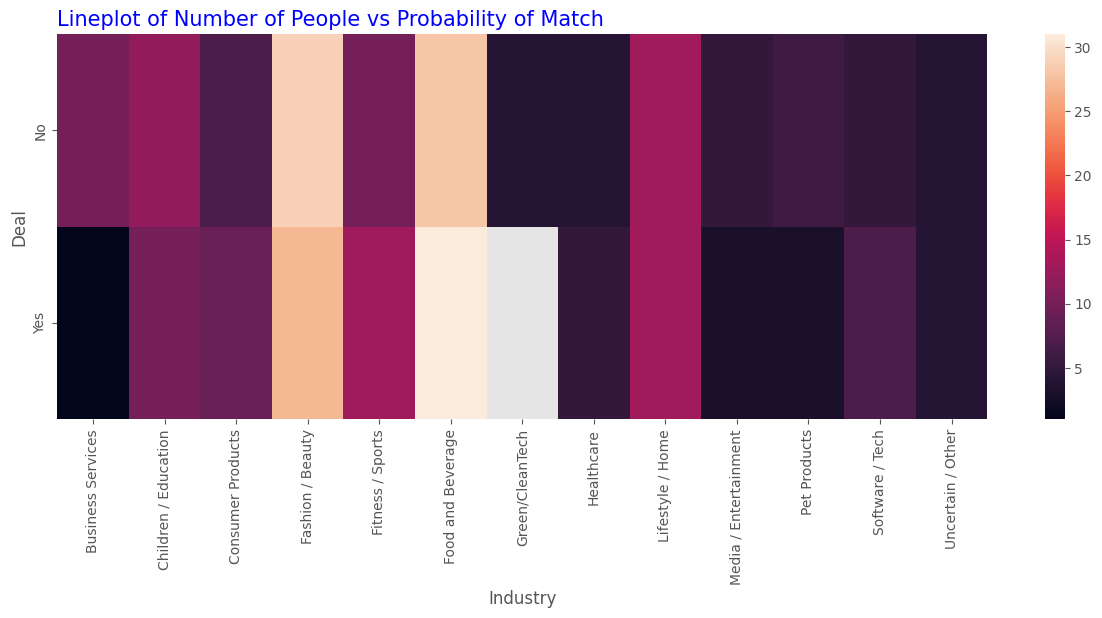

In [306]:
# Answer
fig, ax = plt.subplots(figsize=(15, 5))
shark_tank_tidy = shark_tank.pivot_table(index = 'Deal',
                                  columns = 'Industry',
                                  aggfunc = 'size')

sns.heatmap(shark_tank_tidy)
ax.set_title('Heat Map of Deal vs Industry',
               loc='left', 
               color='blue',
               fontsize = 15)

# The Heat Map suggests that the sharks tended to favor companies the Green/Clean Tech and Food and Beverage
# fields more than the rest. They have invested in these two types of companies the most. The largest
# proportion of deals to no deals came from the Green/Clean Tech industry. 